### Objectives of this notebook:
- display output from Training Image Modelling
- perform analysis on output. eg. feature importance and Training Image selection
- in console do: jupyter nbconvert --to="python" '.\Postprocessing.ipynb'
- this will upload the file in pure python format

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio
import sys
import random 
import datetime
import pathlib

sys.path.append("../")
from training_images.TI_selection import TI_selection
pio.renderers.default = "browser"


### Import data

In [2]:
dataset = "2020_12_14_12_25" #2020_11_20_16_03 2020_11_28_12_34

TI_data = TI_selection(dataset = dataset, n_shedules = 2,TI_name = "TI_flank")

In [3]:
pio.renderers.default = "browser"
TI_data.plot_TI_performance()

Plotting Training Image 586


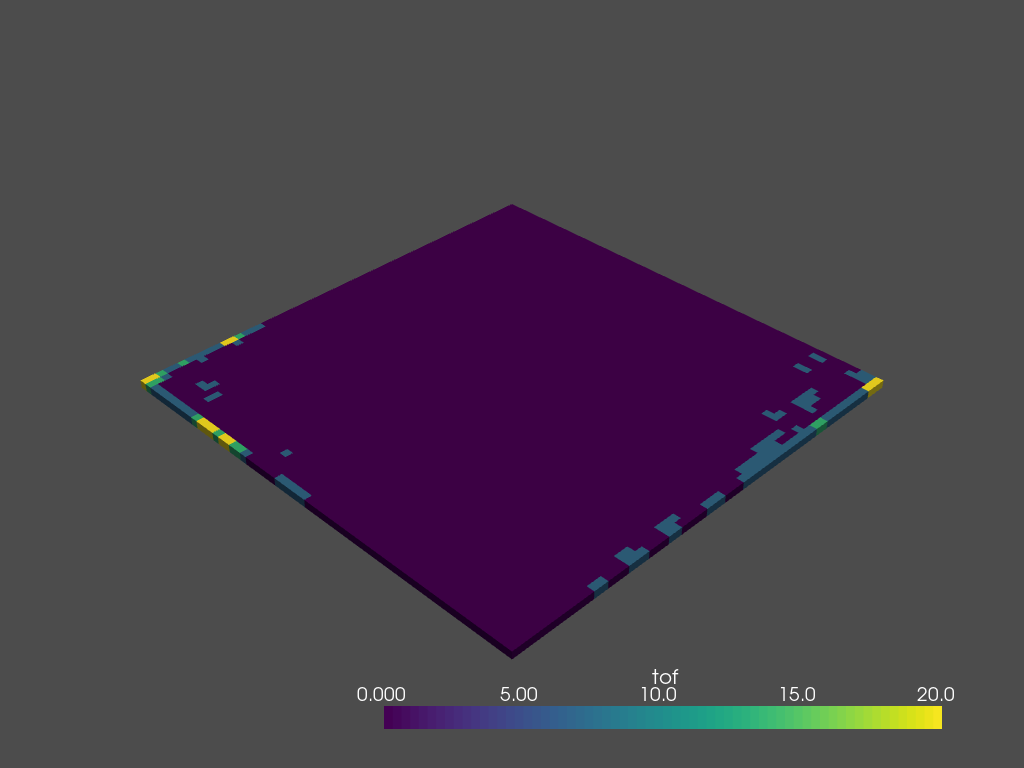

In [37]:
TI_data.plot_best_model(TI_id = 586, random_TI = False, property ="tof",n_bins = 4,min_tof_bin = 0,max_tof_bin =20,shedule_no = 0)

In [3]:
TI_data.calculate_TI_tof_entropy(shedule_no = 0)
TI_data.calculate_TI_tof_entropy(shedule_no = 1)

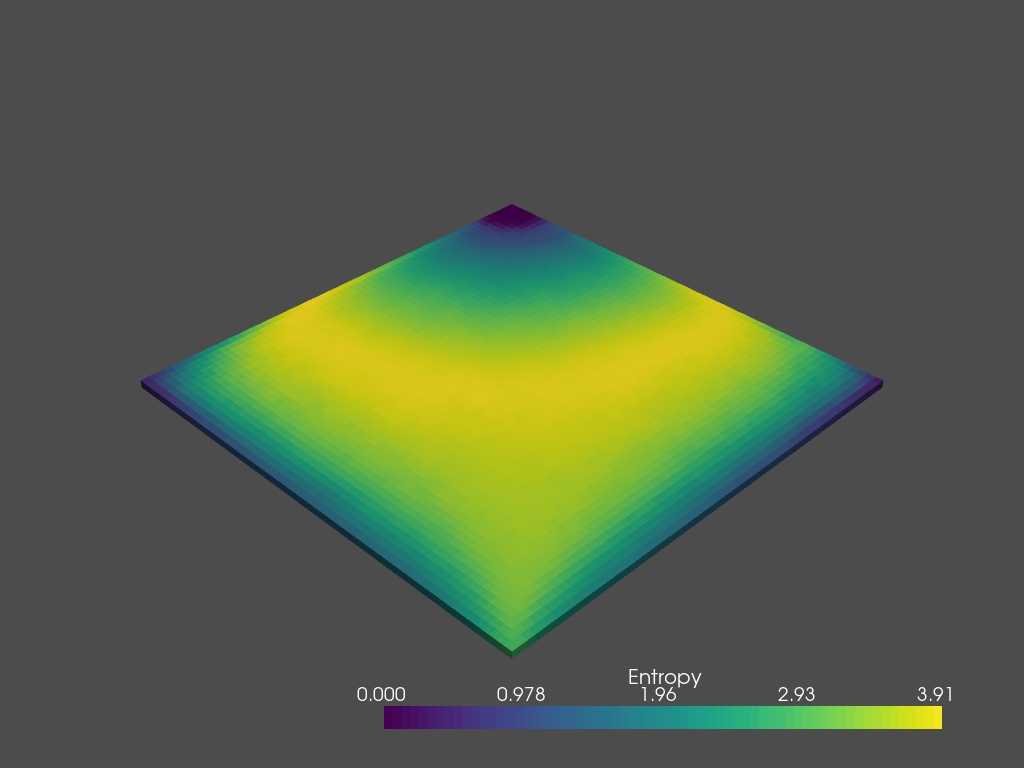

In [27]:
TI_data.plot_tof_entropy(max_tof_bin = 15,n_bins = 15,shedule_no = 0)

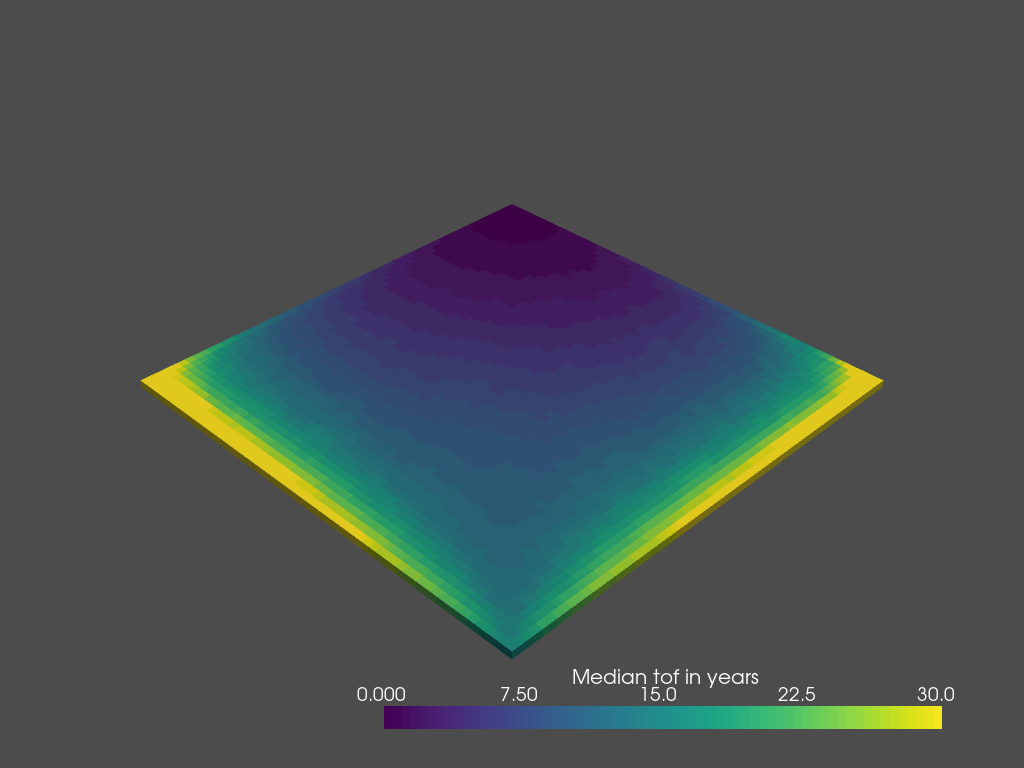

In [102]:
TI_data.plot_tof_all_models(n_bins = 30,shedule_no = 0,max_tof_bin = 30)

In [32]:
pio.renderers.default = "notebook"

TI_data.clustering_tof_or_TI_props(n_neighbors = 20,min_dist = 0,n_components = 30, min_cluster_size = 15,
                           min_samples = 1,allow_single_cluster = False,cluster_parameter = "tof",use_tof_entropy = False,min_tof_bin = 0,max_tof_bin = 20, n_bins = 20)



In [25]:
TI_data.cluster_TI_selection(n_TIs= 20)

In [165]:
TI_data.save_best_clustered_TIs()

Path ..\training_images\..\..\Output\training_images\TI_flank\2020_12_14_12_25\


### Feature importance - model explainability

In [38]:
import shap
from sklearn.ensemble import RandomForestRegressor


In [53]:
TI_data.df_TI_props

TI_no      P32  P32_random  P32_area_specific  n_fracsets_random  \
0        0  0.04937     0.02814            0.02123                2.0   
1        1  0.08823     0.03441            0.05382                1.0   
2        2  0.06182     0.02349            0.03833                4.0   
3        3  0.07499     0.02625            0.04874                4.0   
4        4  0.05938     0.00653            0.05285                2.0   
..     ...      ...         ...                ...                ...   
595    595  0.06209     0.01801            0.04408                4.0   
596    596  0.02674     0.00053            0.02621                4.0   
597    597  0.09785     0.03229            0.06556                4.0   
598    598  0.01573     0.00928            0.00645                2.0   
599    599  0.08232     0.05022            0.03210                3.0   

     n_fracsets_area_specific  seed_random_0  P32_random_0  \
0                         3.0        87718.7      0.014070   
1                         2.0        88640.8      0.034410   
2                         2.0        60768.5      0.005873   
3                         1.0        55901.4      0.006562   
4                         3.0        12450.2      0.003265   
..                        ...            ...           ...   
595                       2.0        92647.3      0.004503   
596                       2.0         7931.7      0.000132   
597                       3.0        13683.0      0.008072   
598                       3.0        30908.3      0.004640   
599                       2.0        97144.0      0.016740   

     frac_length_shape_random_0  frac_length_scale_random_0  ...  mean_permz  \
0                          2.36                        8.59  ...     303.249   
1                          2.25                       14.23  ...     143.244   
2                          2.15                        5.84  ...     317.580   
3                          2.13                       21.75  ...     261.466   
4                          2.40                        5.02  ...     399.359   
..                          ...                         ...  ...         ...   
595                        2.17                        7.83  ...     262.011   
596                        2.19                       11.79  ...     148.331   
597                        2.31                       23.45  ...     201.216   
598                        2.21                        6.42  ...     202.290   
599                        2.49                       19.79  ...     245.221   

     frac_cell_fraction      LC_0      LC_1  tof_entropy_0  tof_entropy_1  \
0              0.587500  0.252649  0.236919       2.015342       3.551338   
1              0.245000  0.181825  0.171868       2.662924       2.961557   
2              0.600000  0.161332  0.221615       2.317765       2.272836   
3              0.362222  0.244689  0.238643       3.168779       3.268869   
4              0.798333  0.250733  0.289756       0.098865       1.212113   
..                  ...       ...       ...            ...            ...   
595            0.539722  0.186969  0.220630       3.096303       2.818293   
596            0.380278  0.204612  0.217419       3.476174       2.879266   
597            0.455556  0.216256  0.184460       3.191947       3.120141   
598            0.592500  0.200123  0.250242       2.606349       2.252022   
599            0.230000  0.182957  0.181822       2.489062       2.601130   

     cluster_tof_prob  cluster_tof  cluster_tof_x  cluster_tof_y  
0            1.000000            6       1.956588       4.472660  
1            1.000000            0       9.652709       4.368558  
2            1.000000            2       0.373519       4.461041  
3            1.000000            3       6.737373       4.363615  
4            0.583201            1      -1.092518       4.496622  
..                ...          ...            ...            ...  
595          1.000000       

In [45]:
X_train = TI_data.df_TI_props.drop(["TI_no","cluster_tof","LC_0","LC_1","cluster_tof_prob","cluster_tof_x","cluster_tof_y","frac_cell_fraction","tof_entropy_0","tof_entropy_1"],axis = 1)
Y_train = TI_data.df_TI_props["cluster_tof"]

In [46]:
# load JS visualization code to notebook
shap.initjs()

In [47]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

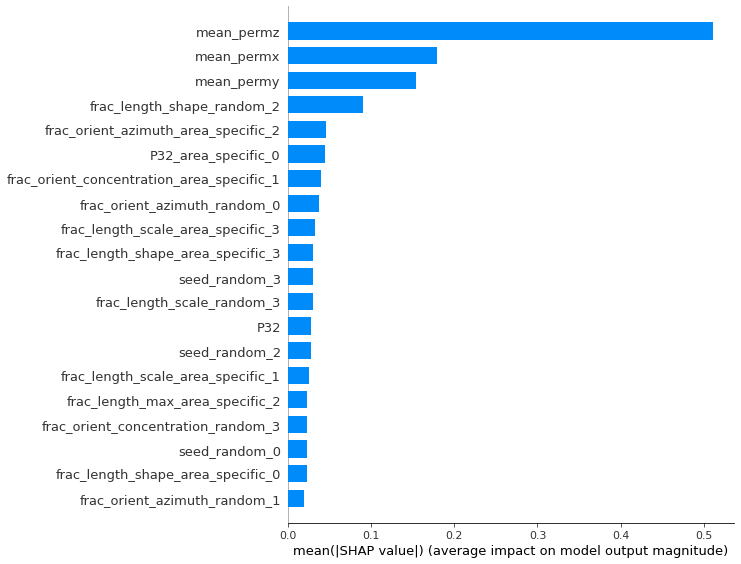

In [48]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [49]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[80,:], X_train.iloc[80,:])

In [52]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

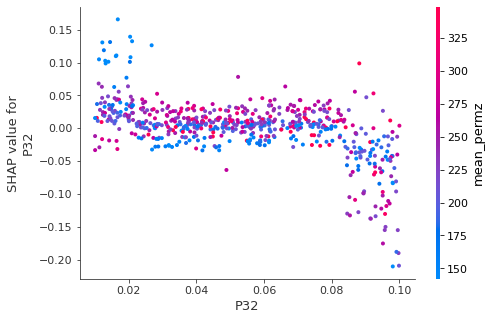

In [56]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("P32", shap_values, X_train)

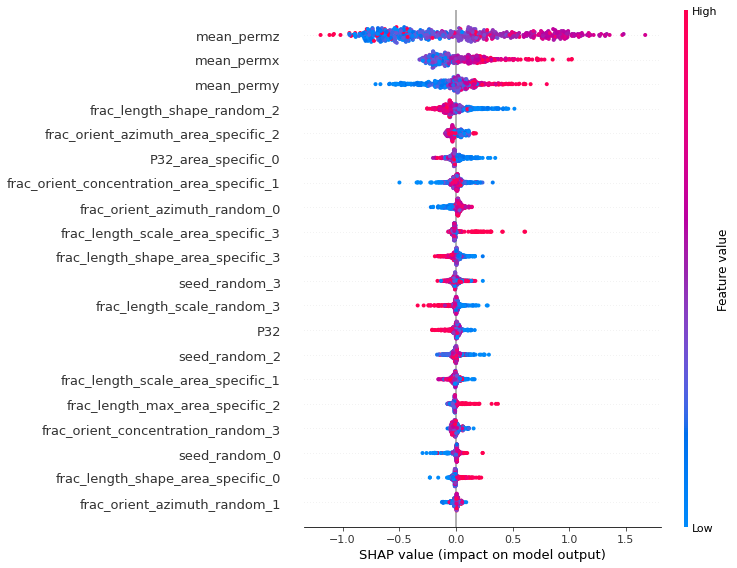

In [57]:
shap.summary_plot(shap_values, X_train)
